In [1]:
import yaml
import numpy as np

from scipy.interpolate import SmoothBivariateSpline

import sys
sys.path.append("../")

from electronfactors.ellipse.equivalent import EquivalentEllipse

In [2]:
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

import descartes as des

In [3]:
energy = 12
applicator = 10
ssd = 100

filepath = (
    "output/model_cache_" + 
    str(energy) + "MeV_" + 
    str(applicator) + "app_" + 
    str(ssd) + "ssd.yml"
)

In [4]:
with open(filepath, 'r') as inputFile:
    input_dict = yaml.load(inputFile)

In [5]:
width = np.zeros(len(input_dict))
length = np.zeros(len(input_dict))
factor = np.zeros(len(input_dict))
label = [0] * len(input_dict)
poi = [0] * len(input_dict)

for i, key in enumerate(input_dict):
    width[i] = input_dict[key]['width']
    length[i] = input_dict[key]['length']
    factor[i] = input_dict[key]['factor']
    label[i] = key
    poi[i] = input_dict[key]['poi']
    
ratio = width/length
eqPonA = 2*( 3*(ratio+1) - np.sqrt( (3*ratio+1)*(ratio+3) ) ) / width

bivariateSpline = SmoothBivariateSpline(width,eqPonA,factor,kx=2,ky=2)

def circle_fit(radii):
    
    if radii >= 1.5:
        result = bivariateSpline.ev(radii*2, 2/radii)
        
    else:
        result = 0.
               
    return result

In [6]:
output_dict = dict()
equivalentEllipse = dict()

In [ ]:
def plot_equivalent_ellipse(eqEllipseObject):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    patch = des.PolygonPatch(eqEllipseObject.centredCutout, fc=np.random.uniform(size=3), alpha=0.3)
    ax.add_patch(patch)

    patch = des.PolygonPatch(eqEllipseObject.straightenedCutout, fc=np.random.uniform(size=3), alpha=0.3)
    ax.add_patch(patch)

    patch = des.PolygonPatch(eqEllipseObject.eqEllipse, fc=np.random.uniform(size=3), alpha=0.5)
    ax.add_patch(patch)

    plt.scatter(0,0)
    ax.axis("equal")
    
    plt.title(str(key))
    plt.show()

Progress: 2.4%

Simon #106 cutout:
    Width: 6.08
    Length: 9.71



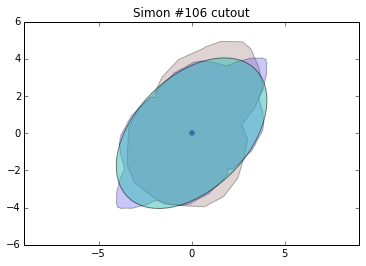

In [ ]:
for i, key in enumerate(label):
    XCoords = input_dict[key]['XCoords']
    YCoords = input_dict[key]['YCoords']
    
    equivalentEllipse[key] = EquivalentEllipse(
        x=XCoords, y=YCoords, 
        circle_fit=circle_fit, n=5, 
        min_distance=1.49,
        poi=poi[i]
    )
    
    
    output_dict[key] = dict()
    width = equivalentEllipse[key].width
    length = equivalentEllipse[key].length
    
    output_dict[key]['width'] = width
    output_dict[key]['length'] = length
    
    print("Progress: %0.1f%%\n" % (100*(i+1) / len(label),))
    print(str(key) + ":\n    Width: %0.2f\n    Length: %0.2f\n" % (width, length))
    
    plot_equivalent_ellipse(equivalentEllipse[key])

In [ ]:
for key in label:
    
    output_dict[key]['XCoords'] = input_dict[key]['XCoords']
    output_dict[key]['YCoords'] = input_dict[key]['YCoords']
    output_dict[key]['factor'] = input_dict[key]['factor']
    output_dict[key]['energy'] = input_dict[key]['energy']
    output_dict[key]['applicator'] = input_dict[key]['applicator']
    output_dict[key]['ssd'] = input_dict[key]['ssd']
    output_dict[key]['poi'] = input_dict[key]['poi']
    
    output_dict[key]['width'] = round(float(output_dict[key]['width']), 2)
    output_dict[key]['length'] = round(float(output_dict[key]['length']), 2)

In [ ]:
width_diff = np.zeros(len(output_dict))
length_diff = width_diff.copy()

for i, key in enumerate(label):
    
    width_diff[i] = output_dict[key]['width'] - input_dict[key]['width']
    length_diff[i] = output_dict[key]['length'] - input_dict[key]['length']

In [ ]:
plt.plot(width_diff)

In [ ]:
plt.plot(length_diff)

In [ ]:
key = label[np.argmax(width_diff)]
key

In [ ]:
plot_equivalent_ellipse(equivalentEllipse[key])

In [ ]:
with open(filepath, 'w') as outfile:
    outfile.write(yaml.dump(output_dict, default_flow_style=False))